# 目的
大山に設置してある環境センサーのデータから、リアルタイムに20分後の天気を予測する <br>
学習モデルに食わせる説明変数を開発する
# 内容
データをクラスタリングして特性を確認する <br>
有効そうな特性が取れたら、そのクラスタ中心を保存しておく <br>
実際にリアルタイムで天気を予測するときは、現在の状況はどのクラスタに属するのかを、クラスタとの距離を計算して説明変数とする

In [7]:
import numpy
import csv
import copy
import pandas as pd
import numpy as np
import sklearn.cluster
import matplotlib.pyplot as plt
import time
import datetime
import math
from pylab import *
# グラフをインラインで表示させる
%matplotlib inline

In [8]:
rain_dt = pd.read_csv("rain_data/rain_dt.csv")
cos_datas = pd.read_csv("rain_data/cos_datas.csv")
sin_datas = pd.read_csv("rain_data/sin_datas.csv")
diff_datas = pd.read_csv("rain_data/diff_datas.csv")
vel_datas = pd.read_csv("rain_data/vel_datas.csv")
velm_datas = pd.read_csv("rain_data/velm_datas.csv")
hum_datas = pd.read_csv("rain_data/hum_datas.csv")

# 様々なデータをクラスタリングしてみる
k-means法を使って、データの時間毎の遷移をクラスタリングすることで、雨が降る何１０分前に変化が起きているのかを確認する <br>
<クラスタリングを行うもの> <br>
・瞬間最大風速の変化 <br>
・風向き<br>
## 瞬間最大風速の変化のクラスタリング

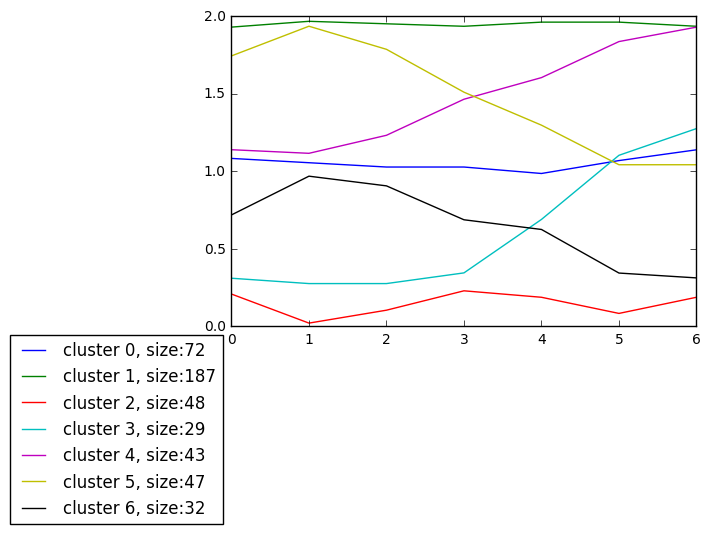

In [3]:
k = 7
#n = 8
matrix = velm_datas.as_matrix().T[3:10].T
#matrix = np.c_[cos_datas.as_matrix().T[n].T, sin_datas.as_matrix().T[n].T]
#matrix = velm_datas.as_matrix().T[4]
#print(matrix)


cluster = sklearn.cluster.KMeans(k, random_state=1)
cluster.fit(matrix)
bincount = np.bincount(cluster.labels_)

for i, p in enumerate(cluster.cluster_centers_):
    plot(p, label='cluster {}, size:{}'.format(i, bincount[i]))
legend(bbox_to_anchor=(0, 0))

## 風向きのクラスタリング

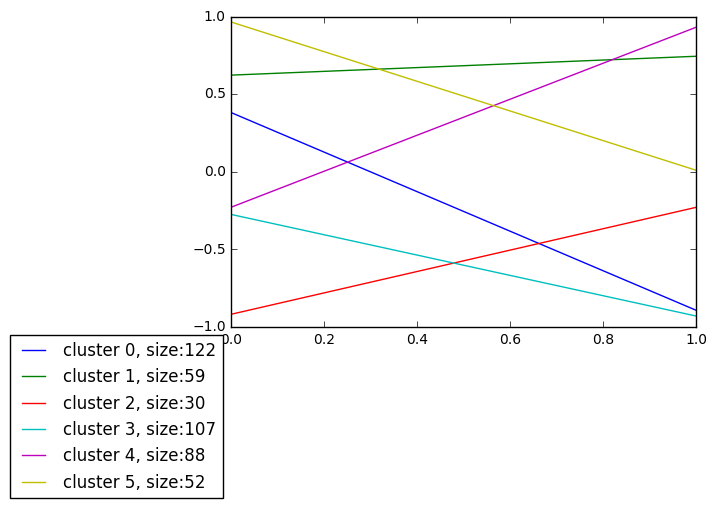

In [5]:
k = 6
n = 8
matrix = diff_datas.as_matrix().T[6:].T
matrix = np.c_[cos_datas.as_matrix().T[n].T, sin_datas.as_matrix().T[n].T]

cluster = sklearn.cluster.KMeans(k, random_state=1)
cluster.fit(matrix)
bincount = np.bincount(cluster.labels_)

for i, p in enumerate(cluster.cluster_centers_):
    plot(p, label='cluster {}, size:{}'.format(i, bincount[i]))
#ylim(-1,1)
#xlim((0, appear_month))
#xticks(range(matrix.shape[1]), range(matrix.shape[1]))
#xlabel('date')
legend(bbox_to_anchor=(0, 0))

## クラスタ中心を表示

In [6]:
cluster.cluster_centers_

array([[ 0.38028979, -0.8952602 ],
       [ 0.622944  ,  0.74456767],
       [-0.91956348, -0.22957935],
       [-0.27635967, -0.93190327],
       [-0.22857361,  0.9325829 ],
       [ 0.96481947,  0.00832563]])

# クラスタ中心を保存

In [149]:
np.save('cluster_data/file_name.npy', cluster.cluster_centers_)

# 瞬間最大風速の分布を確認
瞬間最大風速を３段階に区切ったときの分布を確認する

(array([  75.,  148.,  235.]),
 array([ 0.        ,  0.66666667,  1.33333333,  2.        ]),
 <a list of 3 Patch objects>)

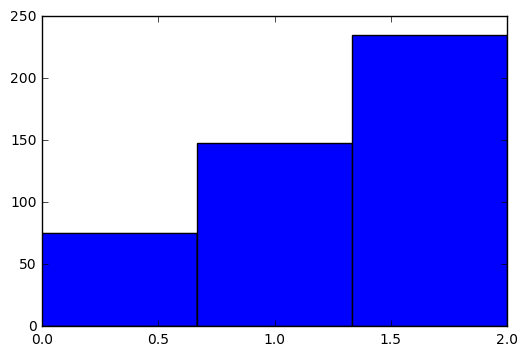

In [4]:
matrix = velm_datas.as_matrix().T[5]
plt.hist(matrix,3)